In [1]:
# project: p8
# submitter: rjfischer
# partner: none

In [2]:
%matplotlib inline

In [3]:
#copied from https://github.com/msyamkumar/cs220-projects/tree/master/spring20/lab-p8b
import matplotlib, pandas

def plot_dict(d, label="Movie Count"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [126]:
import copy
import csv
from csv import DictReader

def get_mapping(path):
    file= open(path, encoding='utf-8')
    file_reader=csv.reader(file)
    data=dict(file_reader)
    file.close()
    return data

def get_raw_movies(path):
    file= open(path, encoding='utf-8')
    file_reader=csv.DictReader(file)
    data=list(file_reader)
    L=[]
    for row in data:
        L.append(dict(row))
    file.close()
    for i in range(len(L)):
        for x in L[i]:
            if x=='year':
                L[i][x]=int(L[i][x])
            elif x=='rating':
                L[i][x]=float(L[i][x])
            elif x=='directors':
                L[i][x]=list(L[i][x].split(','))
            elif x=='actors':
                L[i][x]=list(L[i][x].split(','))
            elif x=='genres':
                L[i][x]=list(L[i][x].split(','))
    return L

def get_movies(movies_path, mapping_path):
    mapping= copy.deepcopy(get_mapping(mapping_path))
    movie=copy.deepcopy(get_raw_movies(movies_path))
    for i in range(len(movie)):
        (movie)[i]['title']=copy.deepcopy(mapping[movie[i]['title']])
        for x in range(len(get_raw_movies(movies_path)[i]['actors'])):
            (movie)[i]['actors'][x]=copy.deepcopy(mapping[(movie)[i]['actors'][x]])
        for x in range(len(get_raw_movies(movies_path)[i]['directors'])):
            (movie)[i]['directors'][x]=copy.deepcopy(mapping[(movie)[i]['directors'][x]])
    return movie

# you are not allowed to change this function
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

def bucketize(movie_list,movie_key):
    buckets={}
    for i in range(len(movie_list)):
        if type(movie_list[i][movie_key])==list:
            for x in range(len(movie_list[i][movie_key])):
                if movie_list[i][movie_key][x] not in buckets:
                    buckets[movie_list[i][movie_key][x]]=[]
                buckets[movie_list[i][movie_key][x]].append(movie_list[i])
        else:
            if movie_list[i][movie_key] not in buckets:
                buckets[movie_list[i][movie_key]]=[]
            buckets[movie_list[i][movie_key]].append(movie_list[i])
    return buckets

#copied from https://github.com/msyamkumar/cs220-projects/tree/master/spring20/lab-p8b
def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)
    
def filter_year(movie_list,start_year=0,end_year=20000):
    x=copy.deepcopy(movie_list)
    i=0
    while i < (len(x)):
        y=(x[i]['year'])
        if start_year>=y or y>=end_year:
                x.pop(i)
        else:
            i+=1
    return(x)

def bucket_counts(movie_list,movie_key):
    G= bucketize(movie_list,movie_key)
    L={}
    for i in G:
        L[i]=len(G[i])
    return(L)

def career_span(movie_list,movie_key):
    b=copy.deepcopy(bucketize(movie_list,movie_key))
    L={}
    for i in b:
        highest=0
        lowest=10000
        for x in range(len(b[i])):
       
            if b[i][x]['year']>highest:
                highest=b[i][x]['year']
            if b[i][x]['year']<lowest:
                lowest=b[i][x]['year']
            L[i]=highest-lowest
    return(L)

def row_ranking(row):
    return row["span"]


def top_n_span(buckets, n):
    # TODO: spans should be a dictionary mapping name to career span
    spans = career_span(movies,buckets)
    rows = []
    for name in spans:
        span = spans[name]
        rows.append({"name": name, "span": span})

    # we want to sort the rows so that those with the biggest spans
    # are first.  Notice that we aren't calling row_ranking, but rather
    # passing a reference to this function to the sort method.  The sort
    # method uses this function to determine how to rank the rows.
    # 
    # we do a reverse sort because we want the biggest spans first,
    # not last
    rows.sort(key=row_ranking, reverse=True)

    return(rows[:n])
    
def row_rating(row):
    return row['rating']
    
def median_rate(ratings):
    n=len(ratings)
    
    if n%2==0:
        median1 = ratings[n//2]['rating']
        median2 = ratings[n//2 - 1]['rating']
        median = (median1 + median2)/2
    else:
        median=ratings[n//2]['rating']
    return (round(median,2))
    
def top_n_best(m_key,n,num_movies=None):
    if num_movies==None:
        ratings= copy.deepcopy(bucketize(movies,m_key))
        rows=[]
    
        for name in ratings:
            ratings[name].sort(key=row_rating,reverse=True)
            rate=median_rate(ratings[name])
            count=len(ratings[name])
            rows.append({'name': name,'rating':rate,'count':count})
        rows.sort(key=row_rating,reverse=True)
        return(rows[:n])
    else:
        ratings= copy.deepcopy(bucketize(movies,m_key))
        x=copy.deepcopy(ratings)
        for i in x:
            if len(ratings[i])<num_movies:
                del ratings[i]
            
        rows=[]
        
        for name in ratings:
            ratings[name].sort(key=row_rating,reverse=True)
            rate=median_rate(ratings[name])
            count=len(ratings[name])
            rows.append({'name': name,'rating':rate,'count':count})
        rows.sort(key=row_rating,reverse=True)
        return(rows[:n])

In [122]:
#q1
mini_data=get_mapping("small_mapping.csv")
mini_data

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [6]:
#q2
mini_data["nm0001219"]

'Gary Fleder'

In [7]:
#q3
L=[]
for i in mini_data:
    if i[:2]=='nm':
        L.append(mini_data[i])
L
        

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [8]:
#q4
L=[]
for i in mini_data:
    if mini_data[i].split(' ')[1][0]=='G':
        L.append(i)
L

['nm0000154', 'nm0000418']

In [9]:
#q5
mini_movies=get_raw_movies("small_movies.csv")
mini_movies

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [10]:
#q6
len((mini_movies[1]['actors']))

4

In [11]:
#q7
((mini_movies[0]['actors'])[0])

'nm0000131'

In [12]:
#q8
small=get_movies("small_movies.csv","small_mapping.csv")
small[1]["title"]

'Lethal Weapon'

In [13]:
#q9
small[0]["actors"]

['John Cusack', 'Gene Hackman', 'Dustin Hoffman']

In [14]:
#q10
small[-1]["directors"]

['Richard Donner']

In [15]:
#q11
movies = get_movies("movies.csv", "mapping.csv")
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [16]:
#q12
movies[:2]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']}]

In [17]:
#q13
x=copy.deepcopy(movies)
filter_movies_by_year(x,1929)

[{'title': 'Redskin',
  'year': 1929,
  'rating': 7.0,
  'directors': ['Victor Schertzinger'],
  'actors': ['Richard Dix', 'Tully Marshall', 'George Regas'],
  'genres': ['Adventure', 'Drama', 'Western']},
 {'title': 'The Girl in the Show',
  'year': 1929,
  'rating': 6.5,
  'directors': ['Edgar Selwyn'],
  'actors': ['Raymond Hackett', 'Edward J. Nugent'],
  'genres': ['Comedy']},
 {'title': 'Atlantic',
  'year': 1929,
  'rating': 5.5,
  'directors': ['Ewald André Dupont'],
  'actors': ['Franklin Dyall', 'John Stuart'],
  'genres': ['Drama']}]

In [18]:
#q14
x=copy.deepcopy(movies)
filter_movies_by_year(x,1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [19]:
#q15

actors=[]
for i in range(len(movies)):
    for x in range(len(movies[i]['actors'])):
        if (movies[i]["actors"])[x] not in actors: 
            actors.append((movies[i]["actors"])[x])

len(actors)

2605

In [20]:
#q16
genres=[]
for i in range(len(movies)):
    for x in range(len(movies[i]['genres'])):
        if (movies[i]["genres"])[x] not in genres: 
            genres.append((movies[i]["genres"])[x])

len(genres)

18

In [21]:
#q17

last_name=''

for i in range(len(movies)):
    if movies[i]['title']>last_name:
        last_name=movies[i]['title']
last_name
    
    


'Zorba the Greek'

In [22]:
#q18
x=copy.deepcopy(movies)
total=0
for i in range(len(movies)):
    total+=movies[i]['rating']
total/(len(movies))

6.401659528907912

In [23]:
#q19
highest_idx=0
highest_val=0
for i in range(len(movies)):
    if movies[i]['rating']>highest_val:
        highest_val=movies[i]['rating']
        highest_idx=i
movies[highest_idx]['title']

'The Godfather'

In [24]:
#q20
oldest_val=20000
oldest_idx=0
for i in range(len(movies)):
    if movies[i]['year']<oldest_val:
        oldest_val=movies[i]['year']
        oldest_idx=i
movies[oldest_idx]['title']

'Shoulder Arms'

In [25]:
#q21
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]
bucketize(test_movies,"style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [26]:
#q22
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [27]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [28]:
#q24
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [29]:
#q25
len(bucketize(small,"directors"))

2

In [30]:
#q26
len(bucketize(movies,"directors"))

1247

In [31]:
#q27

G= bucketize(movies,"genres")
L={}
for i in G:
    L[i]=len(G[i])
L


{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

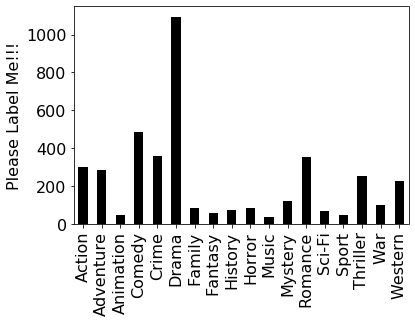

In [32]:
#q28
G= bucketize(movies,"genres")
L={}
for i in G:
    L[i]=len(G[i])
plot_dict(L)

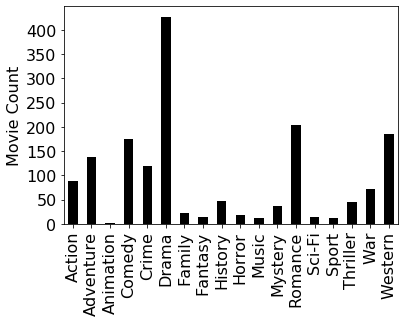

In [33]:
#q29
plot_dict(bucket_counts(filter_year(movies,0,1970), "genres"), "Movie Count")

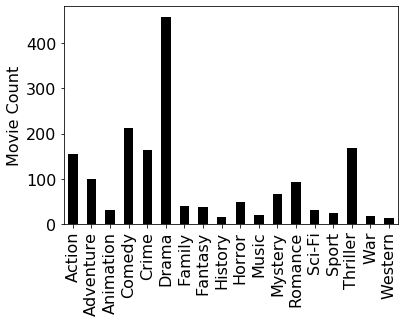

In [34]:
#q30
plot_dict(bucket_counts(filter_year(movies, 1989,20000), "genres"), "Movie Count")

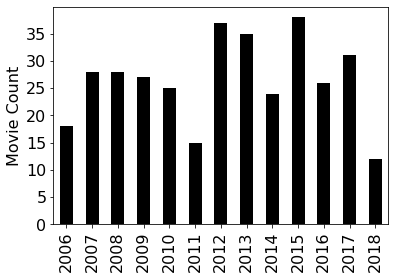

In [35]:
#q31
plot_dict(bucket_counts(filter_year(movies, 2005, 20000), "year"), "Movie Count")

In [133]:
#q32
b=copy.deepcopy(bucketize(movies,'actors'))
L={}
for i in b:
    highest=0
    lowest=10000
    for x in range(len(b[i])):
       
        if b[i][x]['year']>highest:
            highest=b[i][x]['year']
        if b[i][x]['year']<lowest:
            lowest=b[i][x]['year']
    if highest-lowest>=45:
        L[i]=highest-lowest
L

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Marlon Brando': 49,
 'Tony Curtis': 45,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Dean Stockwell': 53}

In [134]:
#q33
b=copy.deepcopy(bucketize(movies,'directors'))
L={}
R=[]
for i in b:
    highest=0
    lowest=10000
    for x in range(len(b[i])):
       
        if b[i][x]['year']>highest:
            highest=b[i][x]['year']
        if b[i][x]['year']<lowest:
            lowest=b[i][x]['year']
    if highest-lowest>=25:
        s=(highest-lowest)
        L[i]=s    
L

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'J. Lee Thompson': 28,
 'Henry Hathaway': 36,
 'John Ford': 25,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'John Sturges': 25,
 'Richard Fleischer': 32,
 'Don Siegel': 27,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Burt Kennedy': 25,
 'William A. Graham': 25,
 'Richard Thorpe': 29,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [47]:
#q34
top_n_span('actors',10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [46]:
#q35
top_n_span('directors',21)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [99]:
#q36
top_n_best('actors',9)

[{'name': 'Heath Ledger', 'rating': 9.0, 'count': 1},
 {'name': 'John Fiedler', 'rating': 8.9, 'count': 1},
 {'name': 'Aldo Giuffrè', 'rating': 8.9, 'count': 1},
 {'name': 'Steven Williams', 'rating': 8.8, 'count': 1},
 {'name': 'Daniel Roebuck', 'rating': 8.8, 'count': 1},
 {'name': 'Joseph Gordon-Levitt', 'rating': 8.8, 'count': 1},
 {'name': 'Miyu Irino', 'rating': 8.6, 'count': 1},
 {'name': 'Andrew Kevin Walker', 'rating': 8.6, 'count': 1},
 {'name': 'Ken Watanabe', 'rating': 8.55, 'count': 2}]

In [125]:
#q37
top_n_best('directors',12)

[{'name': 'James Marlowe', 'rating': 8.8, 'count': 1},
 {'name': 'Kirk Wise', 'rating': 8.6, 'count': 1},
 {'name': 'David Fincher', 'rating': 8.6, 'count': 1},
 {'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'name': 'Adrian Molina', 'rating': 8.4, 'count': 1},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Moustapha Akkad', 'rating': 8.2, 'count': 1},
 {'name': 'Andrew Grieve', 'rating': 8.2, 'count': 6},
 {'name': 'Danny Boyle', 'rating': 8.2, 'count': 1}]

In [127]:
#q38
top_n_best('actors',14,5)

[{'name': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'name': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'name': 'Robert Lindsay', 'rating': 8.2, 'count': 6},
 {'name': 'Charles Chaplin', 'rating': 8.15, 'count': 10},
 {'name': 'Bradley Cooper', 'rating': 7.3, 'count': 5},
 {'name': 'Joe Pesci', 'rating': 7.2, 'count': 7},
 {'name': 'Robin Williams', 'rating': 7.2, 'count': 5},
 {'name': 'Kirk Douglas', 'rating': 7.15, 'count': 12},
 {'name': 'Ward Bond', 'rating': 7.1, 'count': 10},
 {'name': 'Gregory Peck', 'rating': 7.1, 'count': 5},
 {'name': 'Tom Hanks', 'rating': 7.1, 'count': 6},
 {'name': 'Al Pacino', 'rating': 7.05, 'count': 8},
 {'name': 'Ben Johnson', 'rating': 7.05, 'count': 6},
 {'name': 'Charles Coburn', 'rating': 7.0, 'count': 9}]

In [129]:
#q39
top_n_best('actors',16,30)

[{'name': 'Henry Fonda', 'rating': 6.9, 'count': 77},
 {'name': 'Mickey Rooney', 'rating': 6.7, 'count': 82},
 {'name': 'Anthony Quinn', 'rating': 6.7, 'count': 79},
 {'name': 'Brian Donlevy', 'rating': 6.7, 'count': 47},
 {'name': 'Robert Mitchum', 'rating': 6.65, 'count': 74},
 {'name': 'Glenn Ford', 'rating': 6.6, 'count': 74},
 {'name': 'George Sanders', 'rating': 6.6, 'count': 74},
 {'name': 'Robert De Niro', 'rating': 6.55, 'count': 74},
 {'name': 'Randolph Scott', 'rating': 6.5, 'count': 76},
 {'name': 'Jeff Bridges', 'rating': 6.5, 'count': 59},
 {'name': 'Ned Beatty', 'rating': 6.45, 'count': 50},
 {'name': 'Kurt Russell', 'rating': 6.4, 'count': 46},
 {'name': 'John Wayne', 'rating': 6.4, 'count': 130},
 {'name': 'John Cusack', 'rating': 6.4, 'count': 52},
 {'name': 'Danny Glover', 'rating': 6.4, 'count': 51},
 {'name': 'Dennis Quaid', 'rating': 6.35, 'count': 60}]

In [130]:
#q40
top_n_best('directors',8,8)

[{'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Charles Chaplin', 'rating': 8.1, 'count': 11},
 {'name': 'Hayao Miyazaki', 'rating': 8.1, 'count': 9},
 {'name': 'Martin Scorsese', 'rating': 8.0, 'count': 8},
 {'name': 'John Ford', 'rating': 7.3, 'count': 21},
 {'name': 'Fritz Lang', 'rating': 7.2, 'count': 9}]